#### test 용 

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import math
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

In [3]:
def get_stock_price(symbol):
  df = yf.download(symbol, start='2021-02-01', threads= False)
  df['Date'] = pd.to_datetime(df.index)
  df['Date'] = df['Date'].apply(mpl_dates.date2num)
  df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
  return df
symbol = 'COST'
df = get_stock_price(symbol)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head(1)

,Date,Open,High,Low,Close
Date,,,,,
2021-02-01,18659.0,351.209991,352.790009,349.209991,350.519989


In [29]:
#method 1: fractal candlestick pattern
# determine bullish fractal 
def is_support(df,i):  
  cond1 = df['Low'][i] < df['Low'][i-1]   
  cond2 = df['Low'][i] < df['Low'][i+1]   
  cond3 = df['Low'][i+1] < df['Low'][i+2]   
  cond4 = df['Low'][i-1] < df['Low'][i-2]  
  return (cond1 and cond2 and cond3 and cond4) 
# determine bearish fractal
def is_resistance(df,i):  
  cond1 = df['High'][i] > df['High'][i-1]   
  cond2 = df['High'][i] > df['High'][i+1]   
  cond3 = df['High'][i+1] > df['High'][i+2]   
  cond4 = df['High'][i-1] > df['High'][i-2]  
  return (cond1 and cond2 and cond3 and cond4)
# to make sure the new level area does not exist already
def is_far_from_level(value, levels, df):    
  ave =  np.mean(df['High'] - df['Low'])    
  return np.sum([abs(value-level)<ave for _,level in levels])==0
# a list to store resistance and support levels
levels = []
for i in range(2, df.shape[0] - 2):  
  if is_support(df, i):    
    low = df['Low'][i]    
    if is_far_from_level(low, levels, df):      
      levels.append((i, low))  
  elif is_resistance(df, i):    
    high = df['High'][i]    
    if is_far_from_level(high, levels, df):      
      levels.append((i, high))

In [30]:
levels

[(6, 361.6700134277344),
 (23, 307.0),
 (32, 322.3800048828125),
 (68, 387.8900146484375),
 (75, 376.1300048828125),
 (129, 443.5),
 (140, 460.6199951171875),
 (165, 470.489990234375),
 (193, 520.2100219726562),
 (209, 560.780029296875),
 (225, 536.0800170898438),
 (230, 571.489990234375),
 (238, 508.5),
 (269, 482.9800109863281),
 (289, 549.219970703125),
 (294, 586.3200073242188),
 (299, 612.27001953125),
 (329, 406.510009765625),
 (497, 495.239990234375)]

In [8]:
def plot_all(levels, df):    
  fig, ax = plt.subplots(figsize=(16, 9))   
  candlestick_ohlc(ax,df.values,width=0.6, colorup='green', 
    colordown='red', alpha=0.8)    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)    
  for level in levels:        
    plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = 
      max(df['Date']), colors='blue', linestyle='--')    
  fig.show()

[*********************100%***********************]  1 of 1 completed


C:\Users\mi-bi\AppData\Local\Temp\ipykernel_13108\2887692077.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


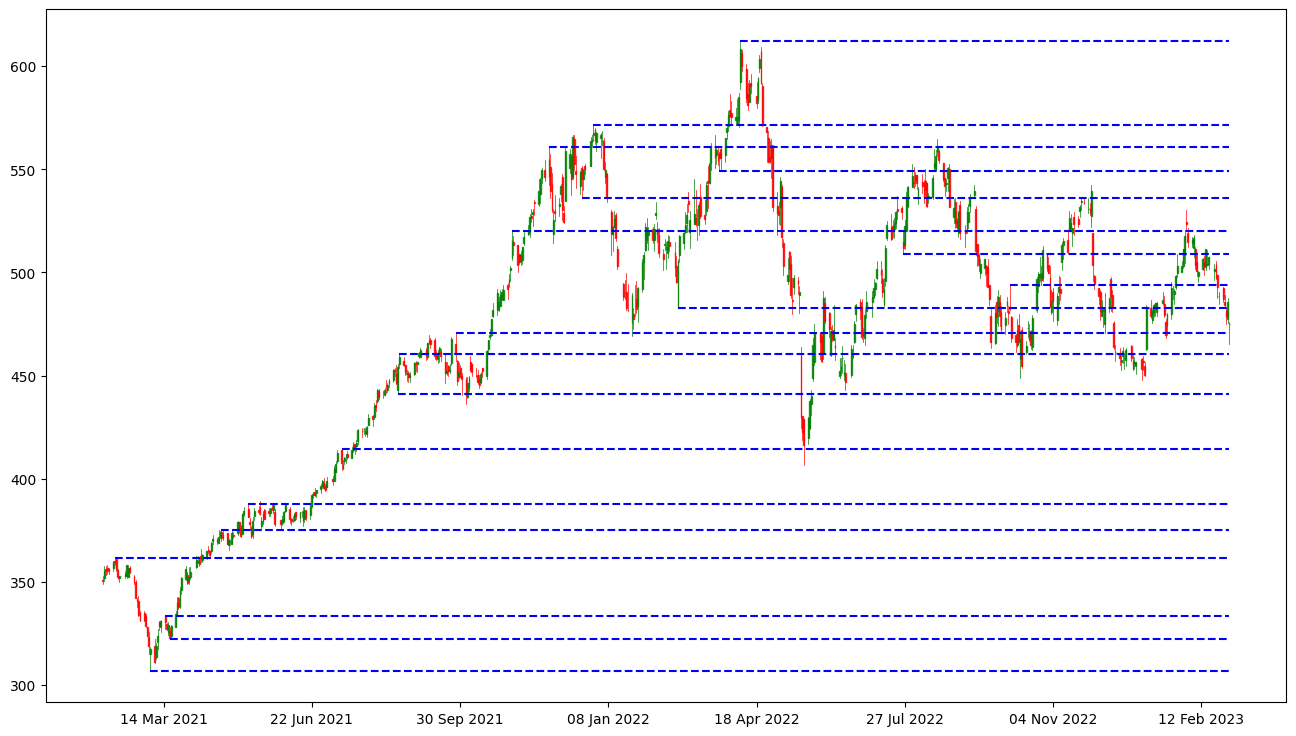

In [9]:
symbol = 'COST'
df = get_stock_price(symbol)
pivots = []
max_list = []
min_list = []
for i in range(5, len(df)-5):
  # taking a window of 9 candles
  high_range = df['High'][i-5:i+4]
  current_max = high_range.max()
  # if we find a new maximum value, empty the max_list 
  if current_max not in max_list:
    max_list = []
  max_list.append(current_max)
  # if the maximum value remains the same after shifting 5 times
  if len(max_list)==5 and is_far_from_level(current_max,pivots,df):
      pivots.append((high_range.idxmax(), current_max))
    
  low_range = df['Low'][i-5:i+5]
  current_min = low_range.min()
  if current_min not in min_list:
    min_list = []
  min_list.append(current_min)
  if len(min_list)==5 and is_far_from_level(current_min,pivots,df):
    pivots.append((low_range.idxmin(), current_min))
plot_all(pivots, df)

#### 우리데이터로

In [2]:
df_raw = pd.read_csv('C:/Users/mi-bi/OneDrive/바탕 화면/data Row/mom.csv', index_col=0)

In [3]:
df = df_raw[df_raw['종목명']=='삼성전자']

In [4]:
# 전처리
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.drop(df.iloc[:,8:11],axis=1)
df.columns = ['Date','Close','Open','High','Low','vol','vol_Price','Name']
df.set_index('Date',drop=False,inplace=True)

C:\Users\mi-bi\AppData\Local\Temp\ipykernel_31824\135353743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['날짜'] = pd.to_datetime(df['날짜'])


In [19]:
df_raw = df_raw.drop(df_raw.iloc[:,8:11],axis=1)
df_raw.columns = ['Date','Close','Open','High','Low','vol','vol_Price','Name']

In [20]:
df_raw.head(1)

,Date,Close,Open,High,Low,vol,vol_Price,Name
0,2022-12-22,10650,9980,11700,9930,28856232,309808795730,바이오노트


In [15]:
#method 1: fractal candlestick pattern
# determine bullish fractal 
def is_support(df,i):  
  cond1 = df['Low'][i] < df['Low'][i-1]   
  cond2 = df['Low'][i] < df['Low'][i+1]   
  cond3 = df['Low'][i+1] < df['Low'][i+2]   
  cond4 = df['Low'][i-1] < df['Low'][i-2]  
  return (cond1 and cond2 and cond3 and cond4) 
# determine bearish fractal
def is_resistance(df,i):  
  cond1 = df['High'][i] > df['High'][i-1]   
  cond2 = df['High'][i] > df['High'][i+1]   
  cond3 = df['High'][i+1] > df['High'][i+2]   
  cond4 = df['High'][i-1] > df['High'][i-2]  
  return (cond1 and cond2 and cond3 and cond4)
# to make sure the new level area does not exist already
def is_far_from_level(value, levels, df):    
  ave =  np.mean(df['High'] - df['Low'])    
  return np.sum([abs(value-level)<ave for _,level in levels])==0

In [16]:
levels = []
for i in range(2, df.shape[0] - 2):  
  if is_support(df, i):    
    low = df['Low'][i]    
    if is_far_from_level(low, levels, df):      
      levels.append((i, low))  
  elif is_resistance(df, i):    
    high = df['High'][i]    
    if is_far_from_level(high, levels, df):      
      levels.append((i, high))

In [30]:
def make_key_levels(df_raw):
    levels = []
    object_list = df_raw['Name'].unique()
    for i in object_list:
        idx = df_raw[df_raw['Name']==i].index
        for i in idx[2:-2]:
            if is_support(df_raw,i):
                low = df['Low'][i]
                if is_far_from_level(low, levels,df_raw):
                    levels.append((i,low))
            elif is_resistance(df_raw,i):
                high = df['High'][i]
                if is_far_from_level(high,levels,df_raw):
                    levels.append((i,high))
    return levels

        


In [31]:
df_raw

,Date,Close,Open,High,Low,vol,vol_Price,Name
0,2022-12-22,10650,9980,11700,9930,28856232,309808795730,바이오노트
1,2022-12-23,10150,10600,11200,10100,8180753,86595242100,바이오노트
2,2022-12-26,9720,10550,10700,9650,4479667,45206813740,바이오노트
3,2022-12-27,9360,9770,9880,9130,4101930,38365054640,바이오노트
4,2022-12-28,8870,9390,9420,8700,3177379,28837782380,바이오노트
...,...,...,...,...,...,...,...,...
2621629,2022-12-23,3765,3900,3900,3765,33477,127543190,모헨즈
2621630,2022-12-26,3720,3765,3765,3610,30218,111265525,모헨즈
2621631,2022-12-27,3755,3700,3755,3665,17856,66261900,모헨즈
2621632,2022-12-28,3630,3770,3775,3615,25279,93477675,모헨즈


In [28]:
df_test = make_key_levels(df_raw)

IndexError: index 1220 is out of bounds for axis 0 with size 1213

In [29]:
df_test

NameError: name 'df_test' is not defined

In [24]:
df_raw['Name']=='삼성전자'

KeyError: '종목명'

In [13]:
object_list = df_raw['종목명'].unique()
for i in object_list:
    idx = df[df['종목명']==i].index
    

,날짜,종가,시가,최고가,최저가,누적거래량,누적거래대금,종목명,5_mom,10_mom,20_mom
0,2022-12-22,10650,9980,11700,9930,28856232,309808795730,바이오노트,NaN,NaN,NaN
1,2022-12-23,10150,10600,11200,10100,8180753,86595242100,바이오노트,NaN,NaN,NaN
2,2022-12-26,9720,10550,10700,9650,4479667,45206813740,바이오노트,NaN,NaN,NaN
3,2022-12-27,9360,9770,9880,9130,4101930,38365054640,바이오노트,NaN,NaN,NaN
4,2022-12-28,8870,9390,9420,8700,3177379,28837782380,바이오노트,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2621629,2022-12-23,3765,3900,3900,3765,33477,127543190,모헨즈,95.195954,94.007491,93.077874
2621630,2022-12-26,3720,3765,3765,3610,30218,111265525,모헨즈,93.820933,95.140665,95.019157
2621631,2022-12-27,3755,3700,3755,3665,17856,66261900,모헨즈,100.133333,91.697192,92.487685
2621632,2022-12-28,3630,3770,3775,3615,25279,93477675,모헨즈,95.275591,87.787183,88.000000


In [12]:
df.shape[0]

1213

In [11]:
levels

[(13, 49800),
 (22, 45080),
 (30, 52020),
 (44, 46920),
 (145, 48450),
 (180, 40400),
 (227, 36850),
 (303, 43800),
 (433, 53500),
 (464, 57300),
 (491, 55200),
 (501, 62000),
 (614, 60400),
 (666, 59000),
 (688, 67000),
 (693, 69500),
 (724, 96800),
 (734, 89900),
 (742, 82100),
 (748, 86000),
 (808, 78400),
 (810, 80900),
 (867, 83300),
 (880, 76600),
 (882, 73800),
 (906, 71200),
 (910, 68300),
 (974, 79600),
 (1045, 64500),
 (1192, 63200)]

In [64]:
# for visualization
def plot_all(levels, df):    
  fig, ax = plt.subplots(figsize=(16, 9))   
  candlestick_ohlc(ax,df.values,width=0.6, colorup='green', 
    colordown='red', alpha=0.8)    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)    
  for level in levels:        
    plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = 
      max(df['Date']), colors='blue', linestyle='--')    
  fig.show()

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'float'

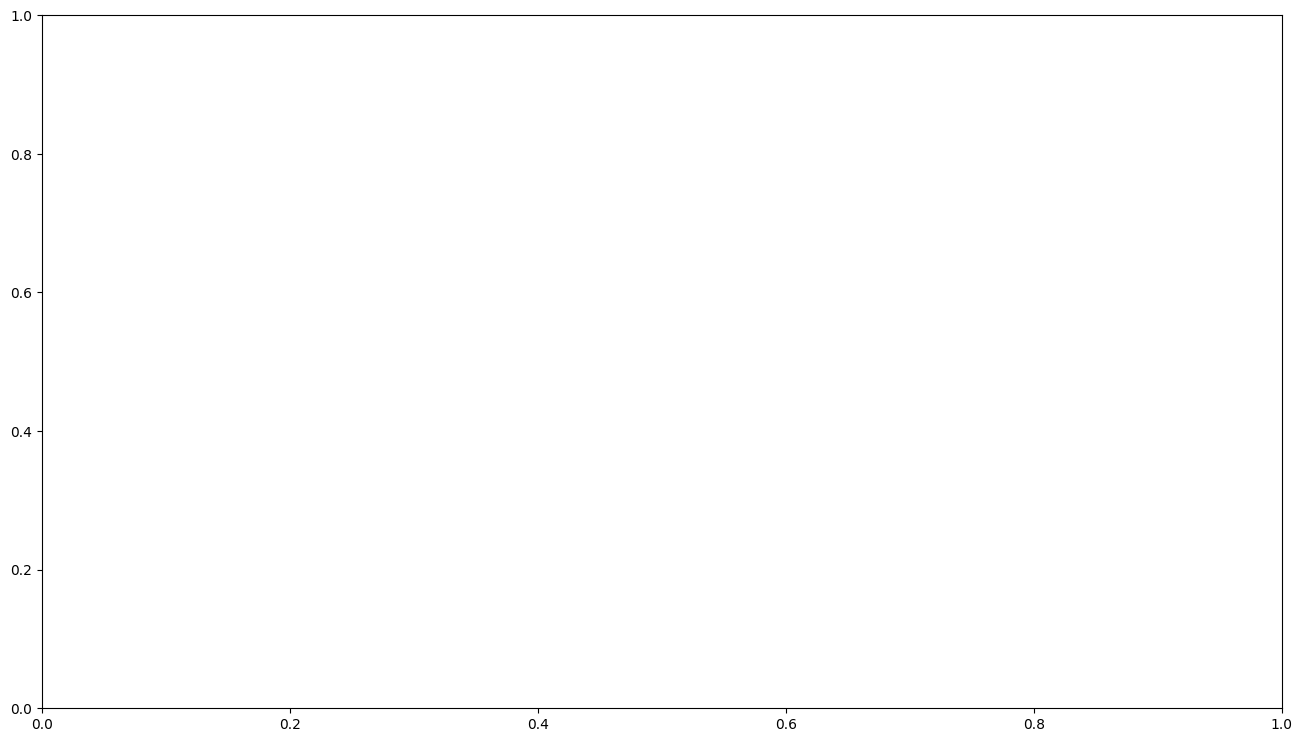

In [65]:
plot_all(levels,df)